### Homework assignment for clinical NLP

(1) Regular Expressions. Complete first 8 “lessons” at https://regexone.com/

(2) Propose a simple way of finding negations in a sentence using regular expressions.  
Your regular expression should make use of the | and * symbols.

In [1]:
import nltk
import re
some_text = ['We are not going home.','We aren\'t going home.', 'We won\'t be going home.', 'We ain\'t going home.','No way are we going home.']
for i in some_text:
    m = re.search(r'are', i)
    if m is None:
        print m
    else:
        print i


We are not going home.
We aren't going home.
None
None
No way are we going home.


(3) Use NLTK to tokenize, stem, POS tag, and find named entities in 
“Fx of obesity but no fx of coronary artery diseases.”  
What named entities are in this sentence? What named entities does NLTK recognize? 
Use NLTK to plot the parse tree returned by 

In [2]:
sent="Fx of obesity but no fx of coronary artery diseases."
sent

'Fx of obesity but no fx of coronary artery diseases.'

In [3]:
token = nltk.word_tokenize(sent)
print token

['Fx', 'of', 'obesity', 'but', 'no', 'fx', 'of', 'coronary', 'artery', 'diseases', '.']


In [4]:
normalized_tokens = [t.lower() for t in token]
print 'Normalized Tokens Include:\n', normalized_tokens

Normalized Tokens Include:
['fx', 'of', 'obesity', 'but', 'no', 'fx', 'of', 'coronary', 'artery', 'diseases', '.']


In [5]:
vocabulary = sorted(set(normalized_tokens))
print 'The Vocabulary Includes:\n', vocabulary

The Vocabulary Includes:
['.', 'artery', 'but', 'coronary', 'diseases', 'fx', 'no', 'obesity', 'of']


In [6]:
stemmed_tokens = [nltk.PorterStemmer().stem(t) for t in vocabulary]
print 'The Stemmed Tokens Include:\n', stemmed_tokens

The Stemmed Tokens Include:
[u'.', u'arteri', u'but', u'coronari', u'diseas', u'fx', u'no', u'obes', u'of']


In [7]:
pos_stemmed_tokens = nltk.pos_tag(stemmed_tokens)
for item in pos_stemmed_tokens:
        print item

(u'.', '.')
(u'arteri', 'NN')
(u'but', 'CC')
(u'coronari', 'JJ')
(u'diseas', 'NNS')
(u'fx', 'VBP')
(u'no', 'DT')
(u'obes', 'NN')
(u'of', 'IN')


In [8]:
pos_tokens = nltk.pos_tag(token)
for item in pos_tokens:
        print item

('Fx', 'NNP')
('of', 'IN')
('obesity', 'NN')
('but', 'CC')
('no', 'DT')
('fx', 'NN')
('of', 'IN')
('coronary', 'JJ')
('artery', 'NN')
('diseases', 'NNS')
('.', '.')


In [9]:
print 'The named entities recognized by Python include:'
for item in pos_tokens:
    if item[1] == 'NNP':
        print item[0]
print '\nThere are actually no named entities in this sentence however.'

The named entities recognized by Python include:
Fx

There are actually no named entities in this sentence however.


In [10]:
chunked_sentence = nltk.ne_chunk(pos_tokens)
print chunked_sentence

(S
  Fx/NNP
  of/IN
  obesity/NN
  but/CC
  no/DT
  fx/NN
  of/IN
  coronary/JJ
  artery/NN
  diseases/NNS
  ./.)


In [11]:
import helper_ner
named_entities = helper_ner.get_all_named_entities(chunked_sentence, structure='string')
print named_entities

[]


In [12]:
import os
from IPython.core.display import display

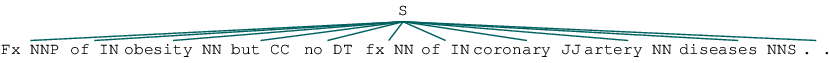

In [13]:
os.environ['PATH'] += os.pathsep + '/usr/local/cellar/ghostscript/9.20/bin'
chunked_sentence

(4) Give several tokens with the “WDT” POS tag

In [14]:
print nltk.help.upenn_tagset('WDT')

WDT: WH-determiner
    that what whatever which whichever
None


(5) Create a dispersion plot of "moon, earth, sun, mars" in the 'sci.space' category of 20 newsgroups.

In [15]:
from sklearn.datasets import fetch_20newsgroups

In [16]:
news = fetch_20newsgroups(subset='train',
                          categories=('sci.space',),
                          remove=('headers', 'footers', 'quotes'))

In [17]:
news.keys()

['description', 'DESCR', 'filenames', 'target_names', 'data', 'target']

In [18]:
news.data[50]

u'For an essay, I am writing about the space shuttle and a need for a better\npropulsion system.  Through research, I have found that it is rather clumsy \n(i.e. all the checks/tests before launch), the safety hazards ("sitting\non a hydrogen bomb"), etc..  If you have any beefs about the current\nspace shuttle program Re: propulsion, please send me your ideas.\n\nThanks a lot.\n'

In [19]:
print news.data[50]

For an essay, I am writing about the space shuttle and a need for a better
propulsion system.  Through research, I have found that it is rather clumsy 
(i.e. all the checks/tests before launch), the safety hazards ("sitting
on a hydrogen bomb"), etc..  If you have any beefs about the current
space shuttle program Re: propulsion, please send me your ideas.

Thanks a lot.



In [20]:
ltokens = [nltk.word_tokenize(doc) for doc in news.data]

In [21]:
import itertools
tokens_all = list(itertools.chain.from_iterable(ltokens))

In [22]:
# convert list of tokens to nltk text object
x = nltk.Text(t.lower() for t in tokens_all)
print "The text comprises %d normalized tokens." % len(x)
print "The first few are", x[:10]

The text comprises 144116 normalized tokens.
The first few are [u'any', u'lunar', u'satellite', u'needs', u'fuel', u'to', u'do', u'regular', u'orbit', u'corrections']


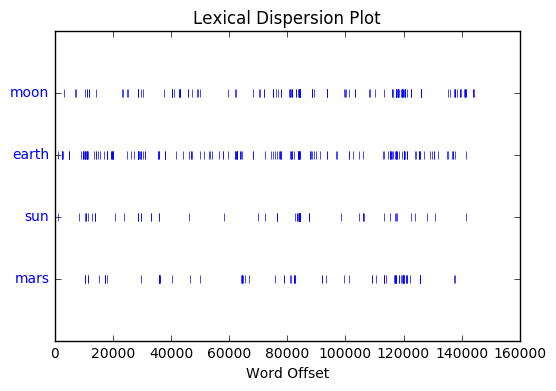

In [23]:
x.dispersion_plot(['moon','earth','sun','mars'])

(6) Write a tag pattern to cover noun phrases that contain gerunds, 
e.g. "the/DT receiving/VBG end/NN", "assistant/NN managing/VBG editor/NN". 
Add these patterns to the grammar, one per line. 
Test your work using some tagged sentences of your own devising.

In [75]:
grammar = r"""
  Gerunds: {<DT>?<NN>?<VBG><NN|RB>}   # chunk gerunds
"""
cp = nltk.RegexpParser(grammar)

gerunds = ['the receiving end', 'assistant managing editor', 'The running back caught the ball.','The waiting room was full.']
gtokens = [nltk.word_tokenize(doc) for doc in gerunds]
gpos = [nltk.pos_tag(doc) for doc in gtokens]

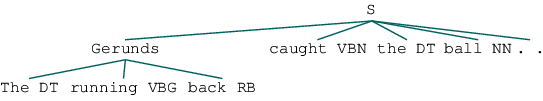

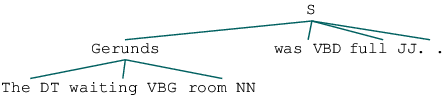

In [76]:
display(cp.parse(gpos[2]))
display(cp.parse(gpos[3]))


(7) Use the function nltk.ne_chunk_sents to find top 10 most common named entities in the 'sci.med' category of 20 newsgroups.

In [24]:
mednews = fetch_20newsgroups(subset='train',
                          categories=('sci.med',),
                          remove=('headers', 'footers', 'quotes'))

In [33]:
import helper_ner

sentences = []
[sentences.extend(nltk.sent_tokenize(text)) for text in mednews.data]
tokenized_sentences = [nltk.word_tokenize(sentence) for sentence in sentences]
tagged_sentences = [nltk.pos_tag(sentence) for sentence in tokenized_sentences]
chunked_sentences = nltk.ne_chunk_sents(tagged_sentences, binary=False)

named_entities = helper_ner.get_all_named_entities(chunked_sentences, structure='string')

from collections import Counter
c = Counter(named_entities)
print c.most_common(10)



[(u'(ORGANIZATION MSG/NNP)', 118), (u'(PERSON Gordon/JJ)', 72), (u'(ORGANIZATION HICNet/NNP Medical/NNP Newsletter/NNP)', 51), (u'(ORGANIZATION HIV/NNP)', 46), (u'(ORGANIZATION AIDS/NNP)', 42), (u'(GPE United/NNP States/NNPS)', 30), (u'(GPE Health/NNP)', 30), (u'(ORGANIZATION University/NNP)', 28), (u'(ORGANIZATION RSI/NNP)', 27), (u'(PERSON O157/NNP)', 27)]


(8) Look at http://scikit-learn.org/stable/modules/feature_extraction.html

Start by initializing ngram_vectorizer = CountVectorizer(analyzer='char_wb', ngram_range=(2, 2), min_df=1)

- Apply this to “Fx of obesity but no fx of coronary artery diseases.” 
- How many features are there?
- How many features do you get with setting ngram_range=(2, 5)?

In [88]:
from sklearn.feature_extraction.text import CountVectorizer
ngram_vectorizer = CountVectorizer(analyzer='char_wb', ngram_range=(2, 2), min_df=1)
ngram_vectorizer

CountVectorizer(analyzer='char_wb', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(2, 2), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [89]:
sent = ['Fx of obesity but no fx of coronary artery diseases']
x = ngram_vectorizer.fit_transform(sent)
x

<1x39 sparse matrix of type '<type 'numpy.int64'>'
	with 39 stored elements in Compressed Sparse Row format>

In [90]:
ngram_vectorizer = CountVectorizer(analyzer='char_wb', ngram_range=(2, 5), min_df=1)
ngram_vectorizer
sent = ['Fx of obesity but no fx of coronary artery diseases']
x = ngram_vectorizer.fit_transform(sent)
x

<1x128 sparse matrix of type '<type 'numpy.int64'>'
	with 128 stored elements in Compressed Sparse Row format>

(9) Read article on Parsey McParseface:

https://www.washingtonpost.com/news/wonk/wp/2016/05/18/googles-new-artificial-intelligence-cant-understand-these-sentences-can-you/?utm_term=.cf835cf7e5fd

What is a garden-path sentence?  
Can Parsey McParseface help with pronoun resolution across sentences?

A garden path sentence is one in which the initial presumed meaning is discovered to be incorrect as the reading of the sentences progresses.

I would think Parsey McParseface would help with pronoun resolution if it involves probabilities. Could just start with who is the most likely referent which would alter as the sentence was processed. 